In [7]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hessian_matrix,hessian_matrix_eigvals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
mask_img=mpimg.imread('training/image_mask.gif')
scaler=StandardScaler()
classifier=KNeighborsClassifier(n_neighbors=5,p=1,weights='distance')

def preProcessing(img):
    gch_img=img[:,:,1]
    return cv2.GaussianBlur(gch_img,(9,9),1.75)

def featureExtractiion(img):
    sobelx=cv2.Sobel(img,cv2.CV_64F,1,0)
    sobely=cv2.Sobel(img,cv2.CV_64F,0,1)
    gradient_magnitude=np.sqrt(sobelx**2.0+sobely**2.0)
    h_elems=hessian_matrix(img,sigma=1.75)
    hm_mev=hessian_matrix_eigvals(h_elems)[0]
    return np.array([gradient_magnitude,hm_mev])
    
def initialize_knn():
    def prepare_training_data():
        data_frame=None
        for i in range(21,26):       
            raw_img=cv2.imread('training/input_images/'+str(i)+'_training.tif')
            pre_processed_img=preProcessing(raw_img)
            feature_matrix=featureExtractiion(pre_processed_img)
            actual_output_img=mpimg.imread('training/output_images/'+str(i)+'_manual1.gif')
            data={'gray':pre_processed_img.reshape(-1),'gradient':feature_matrix[0].reshape(-1),'eigan':feature_matrix[1].reshape(-1),'output':actual_output_img.reshape(-1),'mask':mask_img.reshape(-1)}
            temp_data_frame=pd.DataFrame(data)
            temp_data_frame=temp_data_frame.drop_duplicates()
            temp_data_frame.drop(temp_data_frame[temp_data_frame['mask']<1].index, inplace=True)
            temp_data_frame.drop(['mask'],axis=1,inplace=True)
            print(i)
            if type(data_frame)==type(None):
                data_frame=temp_data_frame
            else:
                data_frame=pd.concat([data_frame,temp_data_frame])
        data_frame=data_frame.drop_duplicates()
        print('data preparation done')
        return [data_frame.iloc[:,:-1].values,data_frame.iloc[:,-1].values]
    x_train,y_train=prepare_training_data()
    scaler.fit(x_train)
    print('Scale fit ')
    x_train=scaler.transform(x_train)
    print('scale transform')
    classifier.fit(x_train,y_train)
    print('model is ready to predict')
    
def error_evaluation(y_test,y_pred):
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
        
def predict(x_test):
    x_test=scaler.transform(x_test)
    return classifier.predict(x_test)

In [14]:
initialize_knn()

21
22
23
24
25
data preparation done
Scale fit 
scale transform
model is ready to predict


In [15]:
def sample(img_num):
        mask_img=mpimg.imread('training/image_mask.gif')
        sample_img=cv2.imread('training/input_images/'+str(img_num)+'_training.tif')
        sample_actual_output_img=mpimg.imread('training/output_images/'+str(img_num)+'_manual1.gif')
        sample_pre_processed_img=preProcessing(sample_img)
        sample_feature_matrix=featureExtractiion(sample_pre_processed_img)
        sample_data={'gray':sample_pre_processed_img.reshape(-1),'gradient':sample_feature_matrix[0].reshape(-1),'eigan':sample_feature_matrix[1].reshape(-1),'output':sample_actual_output_img.reshape(-1),'mask':mask_img.reshape(-1)}
        sample_data_frame=pd.DataFrame(sample_data)
        x_test=sample_data_frame.iloc[:,:-2].values
        y_test=sample_data_frame.iloc[:,-2].values
        return [predict(x_test),y_test]

[[288493  12855]
 [  6064  22548]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    301348
         255       0.64      0.79      0.70     28612

    accuracy                           0.94    329960
   macro avg       0.81      0.87      0.84    329960
weighted avg       0.95      0.94      0.95    329960



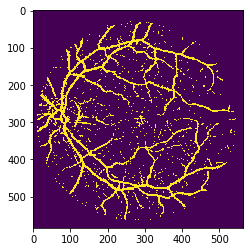

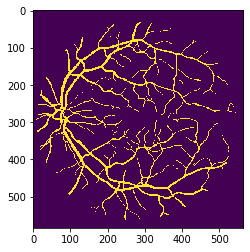

In [17]:
y_pred,y_test=sample(35)
error_evaluation(y_test,y_pred)
plt.figure()
plt.imshow(y_pred.reshape(584,565))
plt.figure()
plt.imshow(y_test.reshape(584,565))

[[282559  11517]
 [  9792  26092]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    294076
         255       0.69      0.73      0.71     35884

    accuracy                           0.94    329960
   macro avg       0.83      0.84      0.84    329960
weighted avg       0.94      0.94      0.94    329960



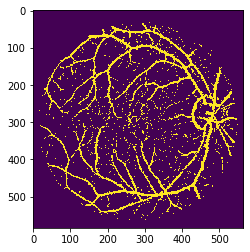

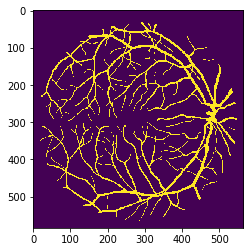

In [18]:
y_pred,y_test=sample(36)
error_evaluation(y_test,y_pred)
plt.figure()
plt.imshow(y_pred.reshape(584,565))
plt.figure()
plt.imshow(y_test.reshape(584,565))

[[289238  11881]
 [  7073  21768]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    301119
         255       0.65      0.75      0.70     28841

    accuracy                           0.94    329960
   macro avg       0.81      0.86      0.83    329960
weighted avg       0.95      0.94      0.94    329960



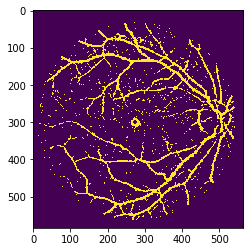

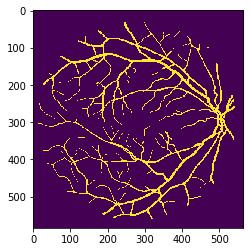

In [7]:
y_pred,y_test=sample(37)
error_evaluation(y_test,y_pred)
plt.figure()
plt.imshow(y_pred.reshape(584,565))
plt.figure()
plt.imshow(y_test.reshape(584,565))

[[298780   2703]
 [ 15703  12774]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    301483
         255       0.83      0.45      0.58     28477

    accuracy                           0.94    329960
   macro avg       0.89      0.72      0.78    329960
weighted avg       0.94      0.94      0.94    329960



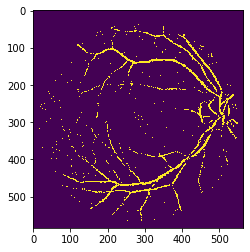

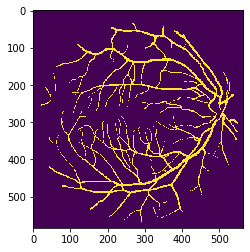

In [8]:
y_pred,y_test=sample(38)
error_evaluation(y_test,y_pred)
plt.figure()
plt.imshow(y_pred.reshape(584,565))
plt.figure()
plt.imshow(y_test.reshape(584,565))

[[291230  10382]
 [  7161  21187]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    301612
         255       0.67      0.75      0.71     28348

    accuracy                           0.95    329960
   macro avg       0.82      0.86      0.84    329960
weighted avg       0.95      0.95      0.95    329960



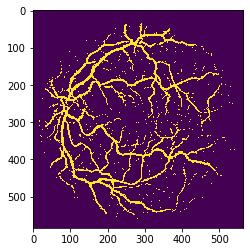

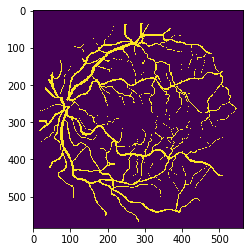

In [9]:
y_pred,y_test=sample(39)
error_evaluation(y_test,y_pred)
plt.figure()
plt.imshow(y_pred.reshape(584,565))
plt.figure()
plt.imshow(y_test.reshape(584,565))

[[292751  12208]
 [  3921  21080]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    304959
         255       0.63      0.84      0.72     25001

    accuracy                           0.95    329960
   macro avg       0.81      0.90      0.85    329960
weighted avg       0.96      0.95      0.95    329960



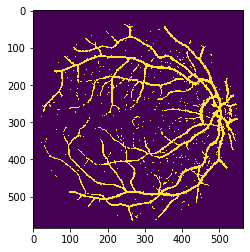

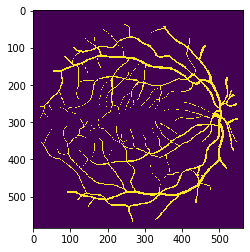

In [10]:
y_pred,y_test=sample(40)
error_evaluation(y_test,y_pred)
plt.figure()
plt.imshow(y_pred.reshape(584,565))
plt.figure()
plt.imshow(y_test.reshape(584,565))